<a href="https://colab.research.google.com/github/Pittella0/HomeWork/blob/main/WK10aSyinc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# load up some pandas and what not
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns



# take a look in a book... i mean data
# the data im using is going over games sold on the Microsoft game consoule the Xbox One
df = pd.read_csv("https://raw.githubusercontent.com/Pittella0/HomeWork/main/XboxOne_GameSales.csv", encoding = 'unicode_escape', engine ='python')


# i noticed the year column is a float and im going to change that later...
copy_df = df.copy()
df.head()


Pos                       Game    Year             Genre  \
0    1         Grand Theft Auto V  2014.0            Action   
1    2  Call of Duty: Black Ops 3  2015.0           Shooter   
2    3         Call of Duty: WWII  2017.0           Shooter   
3    4      Red Dead Redemption 2  2018.0  Action-Adventure   
4    5                  MineCraft  2014.0              Misc   

           Publisher  North America  Europe  Japan  Rest of World  Global  
0     Rockstar Games           4.70    3.25   0.01           0.76    8.72  
1         Activision           4.63    2.04   0.02           0.68    7.37  
2         Activision           3.75    1.91   0.00           0.57    6.23  
3     Rockstar Games           3.76    1.47   0.00           0.54    5.77  
4  Microsoft Studios           3.23    1.71   0.00           0.49    5.43

In [3]:
# whats it lookin like
df.shape


(613, 10)

In [ ]:

"""
All the nulls after looking at the data where games with no release year or 
publisher. I spot checked a few and ran a google search to find the out the fate
of these games, and all where released, and some of the Publishers are big names 
in the industry like Microsoft Industries and Ubisoft. in total there were 108 
entries with N/A in the Year, Publisher, and all the different markets had a 
zero in their columns. Some games were released on the Xbox some wherent so idk.
Im just going to drop them from my data frame, the origional shape was 613,
i still have plenty of data to use. (613 - 108 = 505)


"""
#checking for nulls
df.isnull().sum()

In [5]:
# dropping the NuLL
df = df.dropna()

In [6]:
df.notnull().sum()

Pos              505
Game             505
Year             505
Genre            505
Publisher        505
North America    505
Europe           505
Japan            505
Rest of World    505
Global           505
dtype: int64

In [7]:
# Told ya i do some thing about the year, just needed to drop the N/A
df = df.astype({'Year':'int'})
df.head()

Pos                       Game  Year             Genre          Publisher  \
0    1         Grand Theft Auto V  2014            Action     Rockstar Games   
1    2  Call of Duty: Black Ops 3  2015           Shooter         Activision   
2    3         Call of Duty: WWII  2017           Shooter         Activision   
3    4      Red Dead Redemption 2  2018  Action-Adventure     Rockstar Games   
4    5                  MineCraft  2014              Misc  Microsoft Studios   

   North America  Europe  Japan  Rest of World  Global  
0           4.70    3.25   0.01           0.76    8.72  
1           4.63    2.04   0.02           0.68    7.37  
2           3.75    1.91   0.00           0.57    6.23  
3           3.76    1.47   0.00           0.54    5.77  
4           3.23    1.71   0.00           0.49    5.43

In [8]:
"""
Here i immediately looked at Games to see if i actually have unique data. this 
is all about xbox one video game sales
im also clocking the Genre and Publishers 
"""

#checking whats unique
df.nunique()

Pos              505
Game             504
Year               8
Genre             16
Publisher         98
North America    114
Europe            78
Japan              5
Rest of World     42
Global           146
dtype: int64

In [9]:
df.describe()

Pos         Year  North America      Europe       Japan  \
count  505.000000   505.000000     505.000000  505.000000  505.000000   
mean   262.720792  2015.821782       0.322139    0.160713    0.001010   
std    162.058898     1.382975       0.641556    0.363292    0.004626   
min      1.000000  2013.000000       0.000000    0.000000    0.000000   
25%    127.000000  2015.000000       0.020000    0.000000    0.000000   
50%    254.000000  2016.000000       0.080000    0.020000    0.000000   
75%    380.000000  2017.000000       0.310000    0.130000    0.000000   
max    613.000000  2020.000000       4.700000    3.250000    0.040000   

       Rest of World      Global  
count     505.000000  505.000000  
mean        0.048495    0.532356  
std         0.096320    1.060156  
min         0.000000    0.000000  
25%         0.000000    0.020000  
50%         0.010000    0.120000  
75%         0.050000    0.500000  
max         0.760000    8.720000

In [10]:
"""
here i grab all the unique genres and publisher names for later
i also seperate the tuple and save the first part i need
""" 
genreList=[df["Genre"].unique()]
genreList=genreList[0]
print(len(genreList))
print(genreList)
publisherList=[df["Publisher"].unique()]
publisherList=publisherList[0]
print(len(publisherList))

16
['Action' 'Shooter' 'Action-Adventure' 'Misc' 'Role-Playing' 'Racing'
 'Sports' 'Fighting' 'Adventure' 'MMO' 'Music' 'Simulation' 'Strategy'
 'Platform' 'Puzzle' 'Visual Novel']
98


<Figure size 432x288 with 0 Axes>

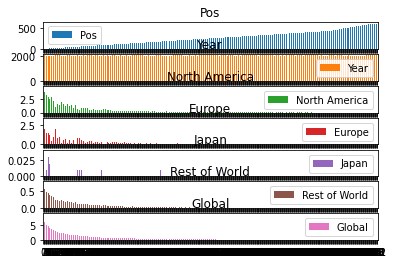

In [11]:
# bin=[df["Genre"].unique()]
# x = "Publisher"
# y=["North America", "Europe", "Japan", "Global"]
# color = ["blue","green","red", "purple"]
#df.groupby('Genre')

fig = plt.figure()
ax = df.plot.bar(rot=0, subplots=True)
# ax = df.plot.hist(x=x,y=y,color=color )


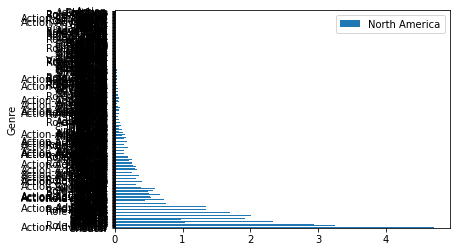

In [22]:
ax = df.plot.barh(x='Genre', y='North America', rot = 0)

Text(0, 0.5, 'North America ?')

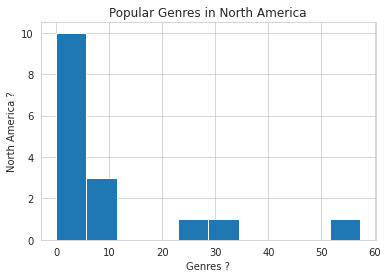

In [45]:
df_group = df.groupby(["Genre"])["North America"].sum()
sns.set_style('whitegrid')

ax = df_group.plot.hist(rot=0)

# ticks =[i for i in range(len(genreList))]


ax.set_title("Popular Genres in North America")
ax.set_xlabel("Genres ?")
# ax.set_xticks(ticks=ticks, labels=['Action', 'Shooter', 'Action-Adventure',
#                                    'Misc', 'Role-Playing', 'Racing','Sports', 
#                                    'Fighting', 'Adventure','MMO', 'Music', 
#                                    'Simulation', 'Strategy','Platform', 
#                                    'Puzzle', 'Visual Novel'])


ax.set_ylabel("North America ?")

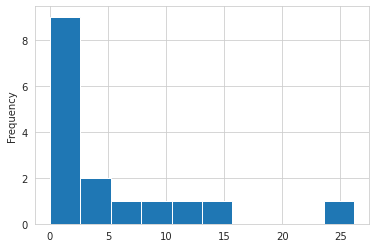

In [30]:

df_group = df.groupby(["Genre"])["Europe"].sum()
sns.set_style('whitegrid')
ax.set_title("Popular Genres in Europe")
df_group.plot.hist(rot=0)

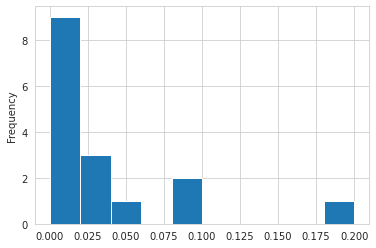

In [46]:
df_group = df.groupby(["Genre"])["Japan"].sum()
sns.set_style('whitegrid')
ax.set_title("Popular Genres in Japan")
df_group.plot.hist(rot=0)

In [56]:
#!pip install pandas_profiling --upgrade

     |████████████████████████████████| 261 kB 7.1 MB/s 
     |████████████████████████████████| 303 kB 44.0 MB/s 
     |████████████████████████████████| 102 kB 7.7 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 10.9 MB 38.5 MB/s 
     |████████████████████████████████| 3.1 MB 35.3 MB/s 
     |████████████████████████████████| 596 kB 33.3 MB/s 
     |████████████████████████████████| 690 kB 38.2 MB/s 
     |████████████████████████████████| 812 kB 48.9 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=7c65e907eea9aa06171724b5cc7b9b1f15df2e9937c99e963005b167c766fbe8
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=896f9a9b2abfeea9ccd9815a622bea011c552b201c7617e20ec6260aea0f9178
  

In [12]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

 # Explination of these libraries 

####Scikit learn
Allows you to get estimations of your data, and run predictions
Allows for data transformation and inspection
 
####Pandas
Used for data manipulation and analysis
 
####Tensorflow
Used for machine learning and artificial intelligence.
 
####Numpy
Data manipulation support for large multi-dimensional arrays and matrices along with a lot of high-level mathematical functions
 
####Tkinter
is a Python binding to the Tk GUI toolkit. It is the standard Python interface to the Tk GUI toolkit,[1] and is Python's de facto standard GUI



# Data Science: What is it?
#### Define it and explain the process


Data Science: Originally a term coined by William S. Cleveland as the combination of Computer Science and Data Mining. With the dawning of web2.0, companies and users were able to interact, creating a need data handlers or Data Scientists. 
 
What the Process is best summed up as collect, store, clean up, analyses, test, and finally Deep learning. 


#Difference between a list and a tuple:


Lists are mutable, they allow for quick changes and great for storing something prone to change
 
Tuples however are immutable, meaning once made they can’t change. Tuples are usually seen as having 2 values they can have more.
 